In [10]:
from covariates_gclass import *

from graspy.embed import AdjacencySpectralEmbed as ASE
from graspy.simulations import sbm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.set_context("talk")

%matplotlib inline

In [4]:
n= 200
pi = 0.5
counts = np.random.multinomial(n, [pi, 1 - pi])
cs = ['r', 'b']
labels = np.concatenate([[cs[i]]*counts[i] for i in range(len(cs))])

d = 2
a1 = 4*np.ones(d)
a2 = 6*np.ones(d)
beta1 = [a1, a2] # beta1 = [[a1, a2, a3, .., ad], [b1, b2, .., bd]]
beta2 = [a2, a1]
beta_params = [beta1, beta2]

B = np.array([[0.7**2, 0.7*0.4], [0.4*0.7, 0.4**2]])

In [11]:
beta_samples = beta_sampler(counts, beta_params)
Z = beta_samples

P = blowup(B, counts) # A big version of B to be able to change connectivity probabilities of individual nodes
scales = np.prod(Z, axis=1)**(1/Z.shape[1])# would do just the outer product, but if the Z's are too small we risk not being connected 
scales = scales[:, np.newaxis]
new_P = P*(scales @ scales.T) # new probability matrix
A1 = sbm(np.ones(n).astype(int), new_P) 
ase_obj = ASE(n_elbows=2)
X1 = ase_obj.fit_transform(A1)

Text(0.5, 1.0, 'Test')

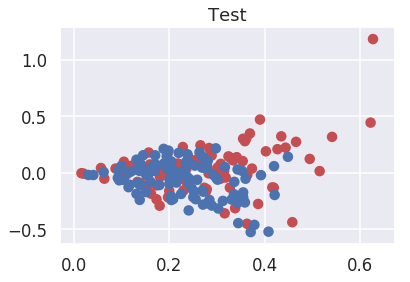

In [12]:
fig, ax = plt.subplots(1,1)
ax.scatter(X1[:, 0], X1[:, 1], c = labels)
ax.set_title('Test')
# ax.set_xlim(0, 0.85)
# ax.set_ylim(-0.4, 0.61)
# plt.savefig('nonconditional_embedding.png')

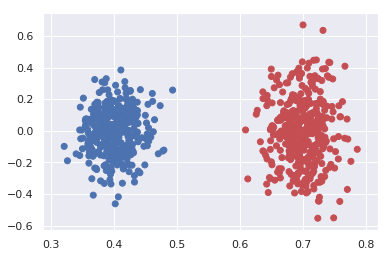

In [75]:
A2 = sbm(counts, B) 
ase_obj = ASE(n_elbows=2)
X2 = ase_obj.fit_transform(A2)
fig, ax = plt.subplots(1,1)
plt.scatter(X2[:, 0], X2[:, 1], c= labels)
# ax.set_xlim(0, 0.85)
# ax.set_ylim(-0.6, 0.61)
# plt.savefig('og_embedding.png')